Title of the Assignment: Data Visualization II
1. Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for distribution of age with respect to each gender along with the information about whether they survived or not. (Column names : 'sex' and 'age')
2. Write observations on the inference from the above statistics.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
titanic = sns.load_dataset('titanic')
titanic1 = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
display(titanic1.isnull().sum())
titanic1['age'] = titanic['age'].fillna(titanic1['age'].mean())
display(titanic1)
display(titanic1.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

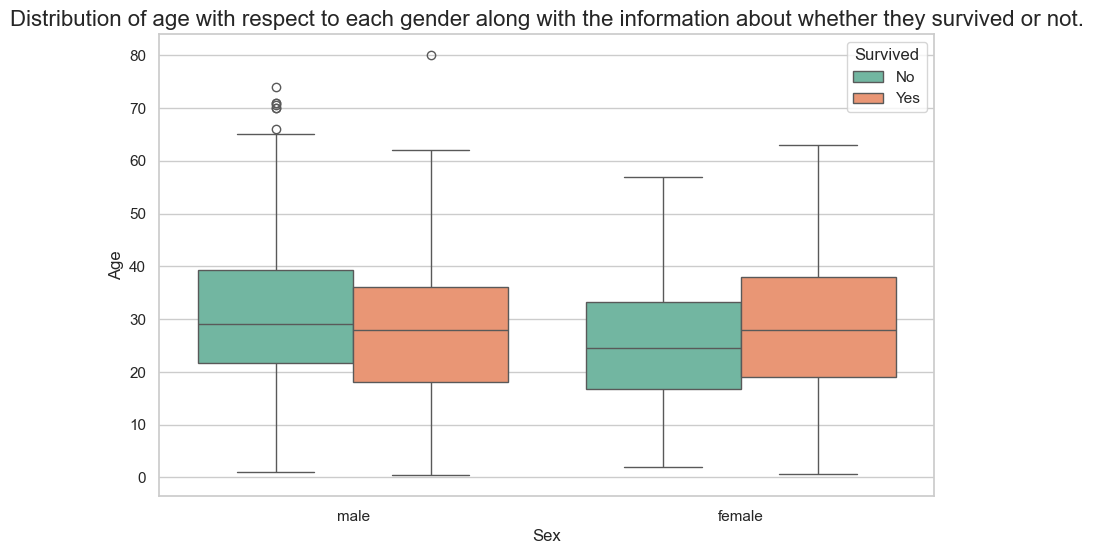

In [36]:
sns.set(style='whitegrid')

plt.figure(figsize=(10,6))
sns.boxplot(data=titanic, x='sex', y='age', hue='survived', palette='Set2')

plt.title('Distribution of age with respect to each gender along with the information about whether they survived or not.', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No', 'Yes'], title='Survived')
plt.show()

Gender-wise age distribution:
- Males tend to have a slightly broader age distribution.
- Females show a more compact distribution, especially among survivors.

Survivors vs Non-survivors:
- Younger passengers (especially females) had a higher chance of survival.
- Among males, the median age of survivors is lower compared to non-survivors.

Outliers:
- There are visible outliers in both male and female categories, suggesting some very old passengers on board.

Survival trend:
- Female survivors appear to be predominantly younger adults.
- Older males had lower survival rates.

In [32]:
# Calculate survival rate by gender (Not in experiment)
survival_rate_by_gender = titanic.groupby(['sex', 'survived']).size().unstack(fill_value=0)
survival_rate_by_gender['survival_rate'] = survival_rate_by_gender[1] / (survival_rate_by_gender[0] + survival_rate_by_gender[1])
print(survival_rate_by_gender)

survived    0    1  survival_rate
sex                              
female     81  233       0.742038
male      468  109       0.188908
